<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/performance_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Last amended: 17th May, 2020
Myfolder: /home/ashok/Documents/10.higgsBoson

Create a virtual environment for Conda with essential packages:
conda create -n sklearn
             -c anaconda
             -c conda-forge
              python=3.7.6 scikit-learn=0.23.2 pandas ipython numpy spyder imbalanced-learn matplotlib

Objectives:
              i)  Quick modeling with multiple models
             ii)  Learn performance measures: ROC, AUC, confusion_matrix
            iii) ROC curve
             iv)  To display uniformity of coding in sklearn

"""


In [2]:
# Upgrade current imbalanced-learn
# Default version is 0.4.3. 
# Current version is 0.8.0
! pip install -U imbalanced-learn

     |████████████████████████████████| 215kB 5.1MB/s 
     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [24]:
import imblearn
imblearn.__version__   # 0.8.0
import sklearn
sklearn.__version__

'0.8.0'

'0.24.2'

## Libraries and Data

### Call libraries

In [5]:
# Import libraries
# 1.0
# %reset -f

# 1.1
import pandas as pd
import numpy as np

# 1.2 For generating dataset
from sklearn.datasets import make_classification
from sklearn.datasets import load_digits

# 1.3 For data splitting
from sklearn.model_selection import train_test_split

# 1.4 For data standardization
from sklearn.preprocessing import StandardScaler

# For noise removal and data standardisation
from sklearn.decomposition import PCA

# 1.5 For pipelining
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as mp

# 1.6 For modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from imblearn.over_sampling import SMOTE, ADASYN,BorderlineSMOTE,SVMSMOTE

# 1.4 For performance measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix


# 1.5 Plotting metrics related graphs
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# Misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os



In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


### Generate and split data

In [ ]:
# 2.0 Generate arrays of data for classification:
#    See examples here: https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922

X,y = make_classification(
                           n_samples=10000,
                           n_features=30,
                           n_informative= 26,     # Relevant features
                           n_redundant=4,         # Four features are linear combination of some features
                           n_repeated =0,         # No duplicate features
                           scale = None,          # Multiply features by some random value 
                           weights=[0.99, 0.01],  # Makes data imbalanced
                           class_sep = 1.5,       # Less it is more difficult class separation
                                                  # Value of 0.75 may make hard-decision boundary
                           flip_y = 0.1           # Flip randomly 10% of class labels
                         )

# 2.0.1
X.shape        # (10000, 30)
print()
y
print()
np.sum(y)/len(y)      # 0.0575, Dataset is highly imbalanced 576/10000


In [8]:
# 2.1 Split, shuffle and perform stratified sampling:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    stratify = y
                                                    )

# 2.1.1
X_train.shape # (7000, 30)
X_test.shape  # (3000, 30)

(7000, 30)

(3000, 30)

## Understanding PCA
Unsupervised learning method

#### Simple experiment with mnist digits

In [9]:
X,y = load_digits(return_X_y= True)
X.shape  # (1797, 64)  1797 images of size 8 X 8
print()
y[:12]

(1797, 64)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

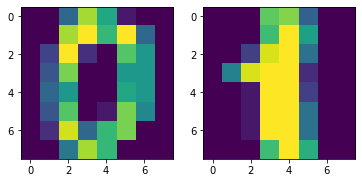

In [32]:
# Plot first two digits
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
_=imshow(X[0].reshape(8,8))
ax1 = fig.add_subplot(1,2,2)
_=imshow(X[1].reshape(8,8))

Steps:  

> Split data train/test  
> Make a pipeline  
>> pipe==> train data-> Standardize->PCA->RF-classifier<br>
>> pipe.fit(train-data)<br>
>> Make predictions  <br>

> Get accuracy<br>

In [11]:
# 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 )
#
pipe = make_pipeline(
                     StandardScaler(),
                     PCA(n_components=0.95),
                     RandomForestClassifier()
                     )

#
_=pipe.fit(X_train,y_train)

#
y_pred = pipe.predict(X_test)

#
print("\n\n---Accuracy----\n")
np.sum(y_test == y_pred)/len(y_test)

#
print("\n\n--How many PCA components--\n")
pipe[1].n_components_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier', RandomForestClassifier())])

0.9685185185185186

39

In [12]:
# 2.1 Perform PCA to remove any noisy columns from data:

pipe = make_pipeline(
                      StandardScaler(),      # This is a must before PCA
                      PCA(n_components=0.95)
                    )


# 2.1.1
X_new = pipe.fit_transform(X_train)
X_new.shape   # (7000, 20)                   

(1257, 39)

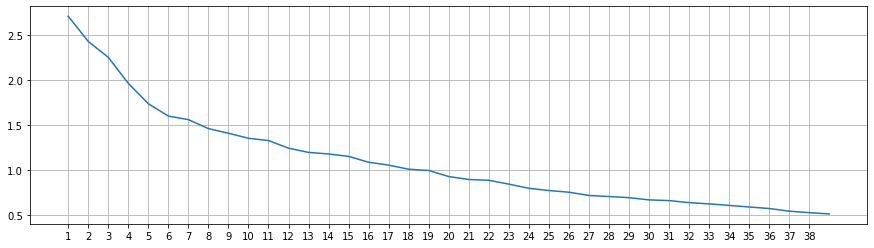

In [17]:
std = np.std(X_new, axis = 0)
fig = plt.figure(figsize = (15,4))
_=plt.plot(range(1,len(std) + 1), std)
_=plt.xticks(range(1,len(std)))
_=plt.grid()

In [18]:
pd.DataFrame(
              np.round(
                         np.corrcoef(X_new, rowvar=False),
                         2
                       )
              )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,1.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
1,0.0,1.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
2,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
3,-0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
4,0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
5,-0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
6,-0.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
7,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
8,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
9,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0


### PCA--A Quick example

In [19]:
# Get mnist data
Xd,yd = load_digits(return_X_y= True)
# About data
Xd.shape  # (1797, 64)  1797 images of flattened size 64 (=8 X 8)
print()
yd[:12]   # What digits are stored

(1797, 64)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

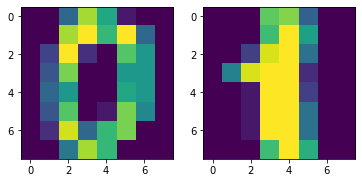

In [20]:
# Draw first two digits
# We have to first reshape 
# digits as 8X8:

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
_=imshow(Xd[0].reshape(8,8))
ax1 = fig.add_subplot(1,2,2)
_=imshow(Xd[1].reshape(8,8))

In [21]:
# Split mnist data in train/test
X_tr,X_te,y_tr,y_te = train_test_split(Xd,yd, test_size = 0.3 )

# Make modeling pipeline
pipe = make_pipeline(
                     StandardScaler(),
                     PCA(n_components=0.95),
                     RandomForestClassifier()
                     )

# Train pipe over data
_=pipe.fit(X_tr,y_tr)

# Make predictions & get accuracy
y_pred = pipe.predict(X_te)
print("\n\n--Accuracy---\n")
np.sum(y_te == y_pred)/len(y_te)

# How many features are there after PCA
print("\n\n--No of features after PCA---\n")
pipe[1].n_components_



--Accuracy---



0.9555555555555556



--No of features after PCA---



40

In [ ]:

X_new.shape  # (10000, 19)


# 2.2.1
X_train.shape         # (7000, 20)
y_train.shape         # (7000,)
np.sum(y_train)       # 103

# 3.0 Perform data balancing:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
X_resampled.shape      # (13794, 20)
#X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
#X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X_train, y_train)
#X_resampled, y_resampled = SVMSMOTE().fit_resample(X_train,y_train)

# 3.1 Create an instance of Gradient Boosting classifier
clf_gbm = GradientBoostingClassifier(
                                     learning_rate = 0.05,
                                     n_estimators = 500
                                     )

# 3.2 Train classifier on resampled data
clf_gbm.fit(X_resampled,y_resampled)
# 3.3 MAke predictions
y_pred_gbm= clf_gbm.predict(X_test)
# 3.4 Performance measures
recall_score(y_test,y_pred_gbm,pos_label = 1)     # 0.6590909090909091
precision_score(y_test,y_pred_gbm,pos_label = 1)  # 0.29
# 3.5
f1_score(y_test,y_pred_gbm, pos_label =1)         # 0.40277777777777773
# 3.6
confusion_matrix(y_test,y_pred_gbm)

# 4.0 Train gbm classifier on original data:
clf1_gbm = GradientBoostingClassifier(
                                       learning_rate = 0.05,
                                       n_estimators = 500
                                      )
# 4.1
clf1_gbm.fit(X_train,y_train)
# 4.2
y1_pred_gbm= clf_gbm.predict(X_test)
# 4.3
f1_score(y_test,y1_pred_gbm, pos_label =1)         #  0.40277777777777773
recall_score(y_test,y1_pred_gbm,pos_label = 1)     #  0.6590909090909091
precision_score(y_test,y1_pred_gbm,pos_label = 1)  # 0.29
confusion_matrix(y_test,y1_pred_gbm)


# 5.0 Using RandomForestClassifier on resampled data:
clf_rf = RandomForestClassifier(n_estimators = 300)
clf_rf.fit(X_resampled,y_resampled)
y_pred_rf=clf_rf.predict(X_test)
f1_score(y_test,y_pred_rf, pos_label =1)  # 0.5977011494252873
recall_score(y_test,y_pred_rf,pos_label = 1)  # 0.5909090909090909
precision_score(y_test,y_pred_rf,pos_label = 1) # 0.6046511627906976
confusion_matrix(y_test,y_pred_rf)

# 5.1 Using RF classifier on original data
clf1_rf = RandomForestClassifier(n_estimators =300)
clf1_rf.fit(X_train,y_train)
y1_pred_rf=clf1_rf.predict(X_test)
f1_score(y_test,y1_pred_rf, pos_label =1)       # 0.5846153846153846
recall_score(y_test,y1_pred_rf,pos_label = 1)   # 0.4318181818181818
precision_score(y_test,y1_pred_rf,pos_label = 1) # 0.9047619047619048
confusion_matrix(y_test,y1_pred_rf)

# 6.1 Plot confusion matrix in each case
plot_confusion_matrix(clf_rf, X_test,y_test)
plot_confusion_matrix(clf_gbm, X_test,y_test)


# 6.2 Plot both ROC curves on the same axes
#       Positive label is always 1 in these plots
fig = plt.figure()
ax = fig.subplots()
plot_roc_curve(
                 clf_gbm,            # Estimator instance
                 X_test, y_test,
                 response_method = 'auto',  # Default target response: predict_proba
                 ax =ax
               )

plot_roc_curve(
                clf_rf,
                X_test, y_test,
                ax =ax
               )

plt.show()


# 6.3 Plot precision recall curves
#       Positive label is always 1 in these plots
fig = plt.figure()
ax = fig.subplots()
plot_precision_recall_curve(clf_rf,  X_test, y_test, ax =ax)
plot_precision_recall_curve(clf_gbm, X_test, y_test, ax =ax)
plt.show()

##### I am done ############
